In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import zipfile
import seaborn as sns

In [2]:
df_w2v = pd.read_csv("/kaggle/input/emi-old-w2v/speeches_all_w2v_emi.csv")

/tmp/ipykernel_18/891529475.py:1: DtypeWarning: Columns (7,8,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_w2v = pd.read_csv("/kaggle/input/emi-old-w2v/speeches_all_w2v_emi.csv")


In [3]:
df_plot_w2v = df_w2v[['date', 'evidence_minus_intuition_score', 'chunk_length']]

df_plot_w2v['date'] = pd.to_datetime(df_plot_w2v['date'])

# Extract the year and create a new column 'year'
df_plot_w2v['date'] = df_plot_w2v['date'].dt.year

/tmp/ipykernel_18/1687155953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_w2v['date'] = pd.to_datetime(df_plot_w2v['date'])
/tmp/ipykernel_18/1687155953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_w2v['date'] = df_plot_w2v['date'].dt.year


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


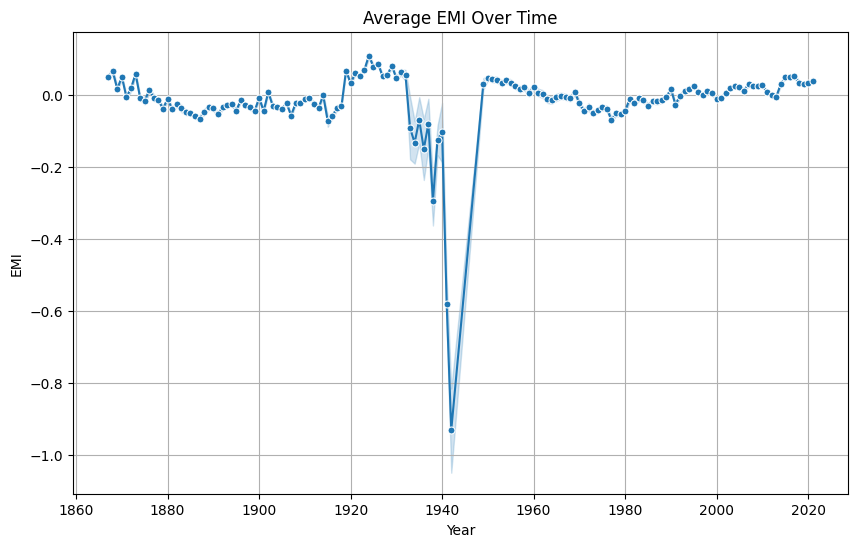

In [4]:
# Grouping by 'Date' (year) and calculating the average 'Value'
df_grouped = df_plot_w2v.groupby('date').mean().reset_index()

# Plotting the average values over time with confidence intervals
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='evidence_minus_intuition_score', data=df_plot_w2v, errorbar=('ci', 95), marker='o')

# Get the current Axes instance on the current figure
ax = plt.gca()

# Adjust the marker size
for line in ax.lines:
    line.set_markersize(5)  # Adjust the marker size here
    
# Customizing the plot
plt.title('Average EMI Over Time')
plt.xlabel('Year')
plt.ylabel('EMI')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('average_emi_over_w2v.png')
plt.show()

In [5]:
#df_old = pd.read_csv("/kaggle/input/emi-old-w2v/speeches_old_emi.csv")
#df_new = pd.read_csv("/kaggle/input/emi-parliament-new-final/speeches_emi.csv")
## Select relevant columns
#df_new_plot = df_new[['date', 'evidence_minus_intuition_score', 'chunk_length']]
#df_new_plot['date'] = pd.to_datetime(df_new_plot['date'])

# Extract the year and create a new column 'year'
#df_new_plot['date'] = df_new_plot['date'].dt.year

#df_old.rename(columns={'dateYear': 'date', "length": "chunk_length"}, inplace=True)

# Select relevant columns from df_old and rename 'year' to 'date'
#df_old_plot = df_old[['date', 'evidence_minus_intuition_score', 'chunk_length']]


# Merge the two dataframes
#df_merged_plot = pd.concat([df_new_plot, df_old_plot], ignore_index=True)

In [6]:
df_sbert = pd.read_csv("/kaggle/input/parliament-all-emi/speeches_all_emi.csv")

/tmp/ipykernel_18/3053438204.py:1: DtypeWarning: Columns (7,8,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sbert = pd.read_csv("/kaggle/input/parliament-all-emi/speeches_all_emi.csv")


**Plotting the German Parliamen EMI over Time**

In [7]:
df_plot_sbert = df_sbert[['date', 'evidence_minus_intuition_score', 'chunk_length']]

df_plot_sbert['date'] = pd.to_datetime(df_plot_sbert['date'])

# Extract the year and create a new column 'year'
df_plot_sbert['date'] = df_plot_sbert['date'].dt.year


/tmp/ipykernel_18/1419815363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_sbert['date'] = pd.to_datetime(df_plot_sbert['date'])
/tmp/ipykernel_18/1419815363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_sbert['date'] = df_plot_sbert['date'].dt.year


Plot Together

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


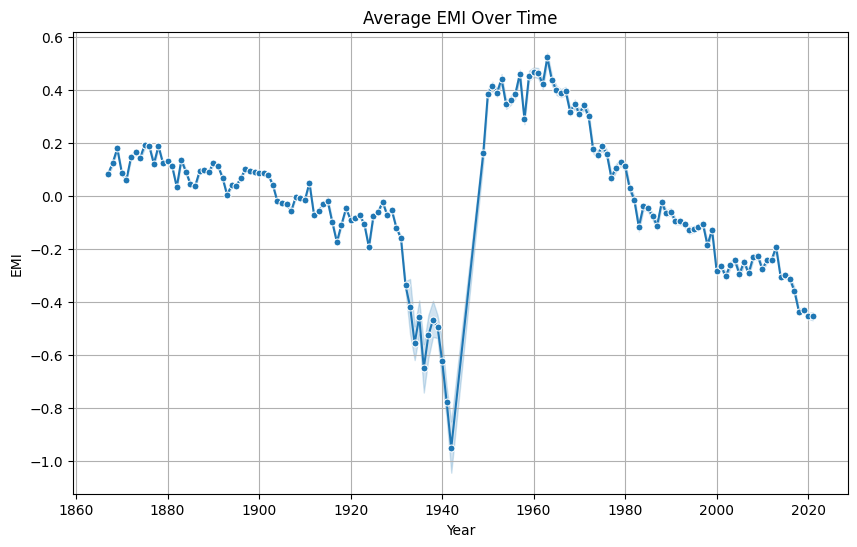

In [8]:
# Grouping by 'Date' (year) and calculating the average 'Value'
df_grouped = df_plot_sbert.groupby('date').mean().reset_index()

# Plotting the average values over time with confidence intervals
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='evidence_minus_intuition_score', data=df_plot_sbert, errorbar=('ci', 95), marker='o')

# Get the current Axes instance on the current figure
ax = plt.gca()

# Adjust the marker size
for line in ax.lines:
    line.set_markersize(5)  # Adjust the marker size here
    
# Customizing the plot
plt.title('Average EMI Over Time')
plt.xlabel('Year')
plt.ylabel('EMI')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('average_emi_over_time_sbert.png')
plt.show()

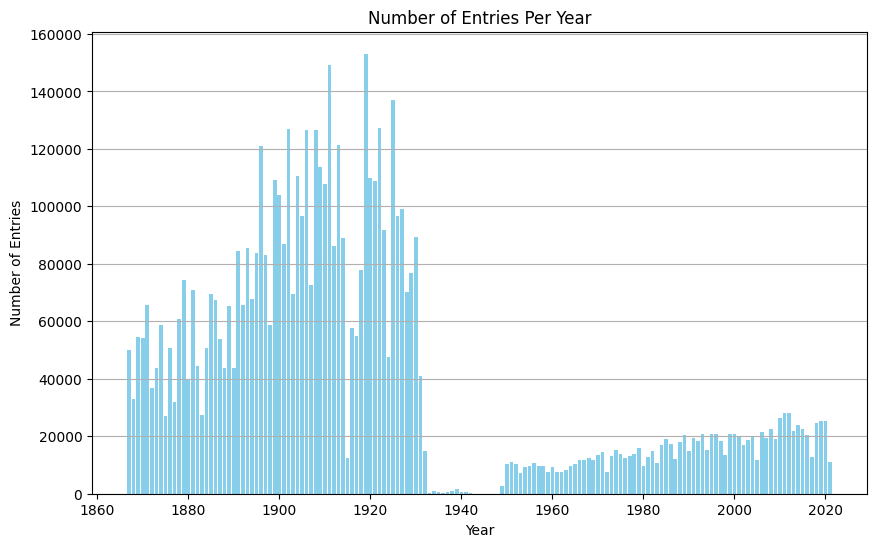

In [9]:
# Counting the number of entries per year
entries_per_year = df_plot_sbert.groupby('date').size().reset_index(name='Entries')

# Plotting the number of entries per year
plt.figure(figsize=(10, 6))
plt.bar(entries_per_year['date'], entries_per_year['Entries'], color='skyblue')
plt.title('Number of Entries Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(axis='y')
plt.savefig('entries_over_time.png')
plt.show()


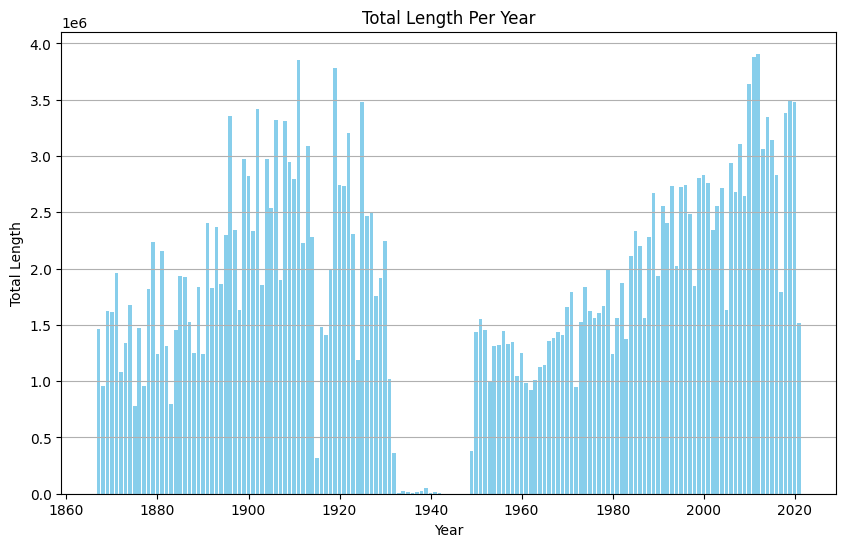

In [10]:
# Summing the lengths per year
total_length_per_year = df_plot_sbert.groupby('date')['chunk_length'].sum().reset_index()

# Plotting the total length per year
plt.figure(figsize=(10, 6))
plt.bar(total_length_per_year['date'], total_length_per_year['chunk_length'], color='skyblue')
plt.title('Total Length Per Year')
plt.xlabel('Year')
plt.ylabel('Total Length')
plt.grid(axis='y')
plt.savefig('tokens_over_time.png')
plt.show()


In [11]:
df_w2v_dot = pd.read_csv("/kaggle/input/w2v-emi-dot-all/speeches_all_w2v_emi_dot.csv")

df_plot_w2v_dot = df_w2v_dot[['date', 'evidence_minus_intuition_score', 'chunk_length']]

df_plot_w2v_dot['date'] = pd.to_datetime(df_plot_w2v_dot['date'])

# Extract the year and create a new column 'year'
df_plot_w2v_dot['date'] = df_plot_w2v_dot['date'].dt.year

/tmp/ipykernel_18/3403477117.py:1: DtypeWarning: Columns (7,8,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_w2v_dot = pd.read_csv("/kaggle/input/w2v-emi-dot-all/speeches_all_w2v_emi_dot.csv")
/tmp/ipykernel_18/3403477117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_w2v_dot['date'] = pd.to_datetime(df_plot_w2v_dot['date'])
/tmp/ipykernel_18/3403477117.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_w2v_dot['date'] = df_plot_w2v_dot['date']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


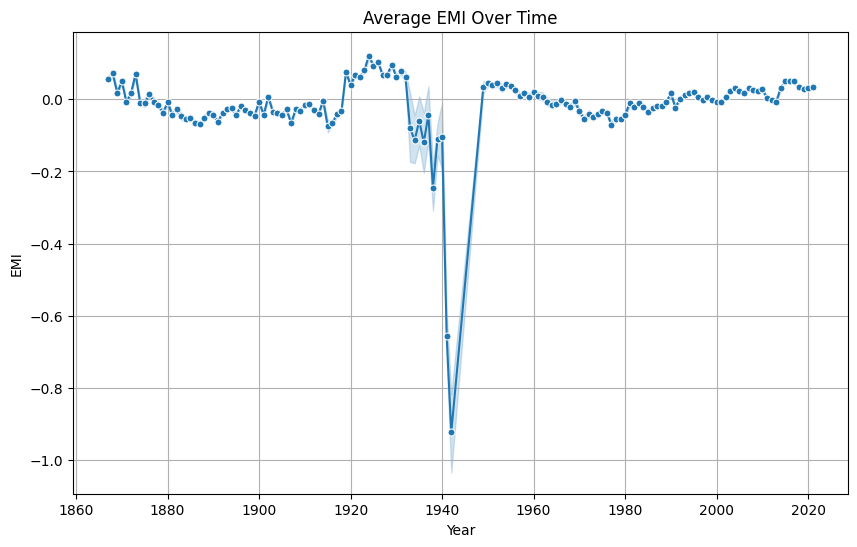

In [12]:
# Grouping by 'Date' (year) and calculating the average 'Value'
df_grouped = df_plot_w2v_dot.groupby('date').mean().reset_index()

# Plotting the average values over time with confidence intervals
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='evidence_minus_intuition_score', data=df_plot_w2v_dot, errorbar=('ci', 95), marker='o')

# Get the current Axes instance on the current figure
ax = plt.gca()

# Adjust the marker size
for line in ax.lines:
    line.set_markersize(5)  # Adjust the marker size here
    
# Customizing the plot
plt.title('Average EMI Over Time')
plt.xlabel('Year')
plt.ylabel('EMI')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('average_emi_over_time_w2v_dot.png')
plt.show()

In [13]:
if 'speechContent' in df_w2v.columns:
    df_w2v.rename(columns={'speechContent': 'text'}, inplace=True)
else:
    print("Column 'speechContent' not found in df_w2v.")

# Ensure 'evidence_minus_intuition_score' is renamed in df_sbert
if 'evidence_minus_intuition_score' in df_sbert.columns:
    df_sbert.rename(columns={'evidence_minus_intuition_score': 'evidence_minus_intuition_score_sbert'}, inplace=True)
else:
    print("Column 'evidence_minus_intuition_score' not found in df_sbert.")

# Check if the columns 'text' and 'id' exist in both DataFrames
print("df_sbert columns:", df_sbert.columns)
print("df_w2v columns:", df_w2v.columns)

if 'text' in df_sbert.columns and 'id' in df_sbert.columns and 'text' in df_w2v.columns and 'id' in df_w2v.columns:
    # Perform a left merge to add the `evidence_minus_intuition_score` column from df_w2v to df_sbert
    df_sbert = df_sbert.merge(df_w2v[['text', 'id', 'evidence_minus_intuition_score']], on=['text', 'id'], how='left')
    
    # Rename the new column for clarity
    df_sbert.rename(columns={'evidence_minus_intuition_score': 'evidence_minus_intuition_score_w2v'}, inplace=True)
    
    # Save the updated DataFrame to a CSV file
    df_sbert.to_csv("speeches_all_emi.csv", index=False)
    
    print("Columns renamed, merged, and DataFrame saved successfully.")
else:
    print("Both DataFrames must contain the 'text' and 'id' columns.")

df_sbert columns: Index(['id', 'begin', 'end', 'text', 'date', 'session', 'electoralTerm',
       'firstName', 'lastName', 'politicianId', 'factionId', 'documentUrl',
       'positionShort', 'positionLong', 'length', 'tokens_top100',
       'fraction_top100', 'chunk_length', 'evidence_score', 'intuition_score',
       'chunk_length_bin', 'evidence_mean', 'evidence_adj', 'intuition_mean',
       'intuition_adj', 'evidence_z', 'intuition_z',
       'evidence_minus_intuition_score_sbert'],
      dtype='object')
df_w2v columns: Index(['id', 'begin', 'end', 'text', 'date', 'session', 'electoralTerm',
       'firstName', 'lastName', 'politicianId', 'factionId', 'documentUrl',
       'positionShort', 'positionLong', 'length', 'chunk_length',
       'evidence_similarity', 'intuition_similarity', 'chunk_length_bin',
       'evidence_mean', 'evidence_adj', 'intuition_mean', 'intuition_adj',
       'evidence_z', 'intuition_z', 'evidence_minus_intuition_score'],
      dtype='object')
Columns renam